# Pricing of GMAB and GMDB

### Question 1

Analytical expressions of the GMAB at time t ≤ T:

 - using call options:

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd


def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes option price.

    Parameters:
        S (float): Current price of the underlying asset
        K (float): Strike price
        T (float): Time to maturity (in years)
        r (float): Risk-free interest rate (annualized)
        sigma (float): Volatility of the underlying asset (annualized)
        option_type (str): Type of the option, either 'call' or 'put' (default is 'call')

    Returns:
        float: The Black-Scholes option price
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if option_type == 'call':
        option_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == 'put':
        option_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Option type must be either 'call' or 'put'")

    return option_price

# Example usage
S = 100     # Current price of the underlying asset
K = 110     # Strike price
T = 1       # Time to maturity (in years)
r = 0.05    # Risk-free interest rate (annualized)
sigma = 0.2 # Volatility of the underlying asset (annualized)

call_price = black_scholes(S, K, T, r, sigma, option_type='call')


print("Black-Scholes Call Price:", call_price)


Black-Scholes Call Price: 6.040088129724239


- using put opitions: 

In [2]:
# Example usage
S = 100     # Current price of the underlying asset
K = 110     # Strike price
T = 1       # Time to maturity (in years)
r = 0.05    # Risk-free interest rate (annualized)
sigma = 0.2 # Volatility of the underlying asset (annualized)

put_price = black_scholes(S, K, T, r, sigma, option_type='put')

print("Black-Scholes Put Price:", put_price)

Black-Scholes Put Price: 10.675324824802793


### Question 2

Binomial tree to price a GMAB of maturity T=8 years

### Question 3

Analytical expressions of the GMDB at time t ≤ T:

- using call options:

- using put options:

### Question 4

Binomial tree to price a GMDB of maturity T=8 years

97.52703280679253

# Pricing of a maximum return insurance

In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import math
import pandas as pd

### Question 1

From the file "Data_project.xlsx": 

In [14]:
def import_excel(file_path):
    ''' Imports xlxs file in the provided path.'''
    try:
        # Read the Excel file into a pandas DataFrame
        df = pd.read_excel(file_path)
        
        # Check if the required columns are present
        required_columns = ['Date']
        if not all(column in df.columns for column in required_columns):
            raise ValueError("Required columns are missing in the Excel file.")
        return df

    except FileNotFoundError:
        print("File not found. Please provide a valid file path.")
    except Exception as e:
        print("An error occurred:", e)

# Import .xlsx file containing date and indexes columns closing values. Example ['Date', "Eurxx50", "Amex"] 
file_path = "/mnt/c/buildbr/finance-stochastic-24/data/Data_project.xlsx" 
data = import_excel(file_path)

In [15]:
def calculate_daily_return(df):
    ''' Calculate the returns, avg, and std for each index-column.'''

    avg_return_idx = []
    std_return_idx = []

    cols = df.columns[1:]

    [col for col in df.columns if 'return' in col]
    for col in cols:
        df[f'return_{col}'] = df[col].pct_change()
        avg_return_idx.append(df[f'return_{col}'].mean())
        std_return_idx.append(df[f'return_{col}'].std())

    return cols, avg_return_idx, std_return_idx

def calculate_returns_corr(df):
    ''' Calculate the return correlation of the indexes.'''

    return_columns = [col for col in df.columns if 'return' in col]
    df_return = df[return_columns]
    return_corr_matrix = df_return.corr()

    correlation = df['return_Amex'].corr(df['return_Eurxx50'])
    cov_matrix = df[return_columns].cov()
    
    return return_corr_matrix, correlation, cov_matrix

if data is not None:
    # Calculate returns
    indexes, avg_returns, std_returns = calculate_daily_return(data)
    # Calculate returns correlation
    corr_matrix, correlation, cov_matrix = calculate_returns_corr(data) # check with slides

- Daily returns of each indice

In [16]:
print(data)

          Date      Eurxx50         Amex  return_Eurxx50  return_Amex
0   2022-02-07  4120.560059  3735.790039             NaN          NaN
1   2022-02-08  4129.250000  3711.939941        0.002109    -0.006384
2   2022-02-09  4204.089844  3733.330078        0.018124     0.005763
3   2022-02-10  4197.069824  3713.290039       -0.001670    -0.005368
4   2022-02-11  4155.229980  3810.250000       -0.009969     0.026112
..         ...          ...          ...             ...          ...
498 2024-01-29  4639.359863  4522.080078        0.000839    -0.002262
499 2024-01-30  4662.700195  4573.000000        0.005031     0.011260
500 2024-01-31  4648.399902  4499.319824       -0.003067    -0.016112
501 2024-02-01  4638.600098  4486.240234       -0.002108    -0.002907
502 2024-02-02  4654.549805  4443.890137        0.003438    -0.009440

[503 rows x 5 columns]


- Averages, standard deviations and correlation of daily returns.

In [17]:
for idx, col in enumerate(indexes):
        print(f'The daiy return average and std deviaton for the {col} are: {round(avg_returns[idx]*100,3)}% and {round(std_returns[idx],3)}')
print(f'The correlation is rho : {round(correlation,3)}')
print(f'The covariance matrix M:')
print(cov_matrix)
print(f'The Choleski decomposition of M:')
np.linalg.cholesky(cov_matrix)

The daiy return average and std deviaton for the Eurxx50 are: 0.032% and 0.012
The daiy return average and std deviaton for the Amex are: 0.046% and 0.015
The correlation is rho : 0.306
The covariance matrix M:
                return_Eurxx50  return_Amex
return_Eurxx50        0.000147     0.000057
return_Amex           0.000057     0.000236
The Choleski decomposition of M:


array([[0.01210911, 0.        ],
       [0.00470035, 0.01462035]])

- Calculate the annual standard deviations, annual returns and covariance
matrix.

In [18]:
for idx, col in enumerate(indexes):
        print(f'The annual return average and std deviaton for the {col} are: {round(avg_returns[idx]*252*100,3)}% and {round(std_returns[idx]* np.sqrt(252),3)}')

The annual return average and std deviaton for the Eurxx50 are: 7.959% and 0.192
The annual return average and std deviaton for the Amex are: 11.686% and 0.244


$$
\text{Cov}(X,Y) = 
\begin{bmatrix}
\sigma_1^2 & \rho \sigma_1 \sigma_1 \\
\rho \sigma_1 \sigma_2 & \sigma_2^2 \\
\end{bmatrix}
$$


In [19]:

cov_matrix_Y = np.array([[std_returns[0]* np.sqrt(252)**2, std_returns[0]* np.sqrt(252)*std_returns[1]* np.sqrt(252)*correlation],
                           [std_returns[0]* np.sqrt(252)*std_returns[1]* np.sqrt(252)*correlation, std_returns[1]* np.sqrt(252)**2]])
print(f'The annualized covariance matrix M:')
print(cov_matrix_Y)


The annualized covariance matrix M:
[[3.05149697 0.01434311]
 [0.01434311 3.87004927]]


$$
\text{$\Sigma$} = 
\begin{bmatrix}
\sigma_1 & 0 \\
\rho \sigma_2  & \sqrt{1 -\rho} \sigma_2 \\
\end{bmatrix}
$$

In [20]:
print(f'The annualized Choleski decomposition of M:')
Cholesky = np.linalg.cholesky(cov_matrix_Y)
print(Cholesky)

The annualized Choleski decomposition of M:
[[1.74685345 0.        ]
 [0.00821083 1.96722695]]


### Question 2
The interest rate is equal r = 3.75% and the maturity is T. Using the parameters estimated from Q1, evaluate the maximum return insurance with a
closed form expression (present and brifly comment it) for T = 1, 2, ...10 years (t = 0).

/tmp/ipykernel_2358/3508663328.py:20: RuntimeWarning: invalid value encountered in scalar divide
  d2 = (np.log(S1 / S2) - ut)/vt


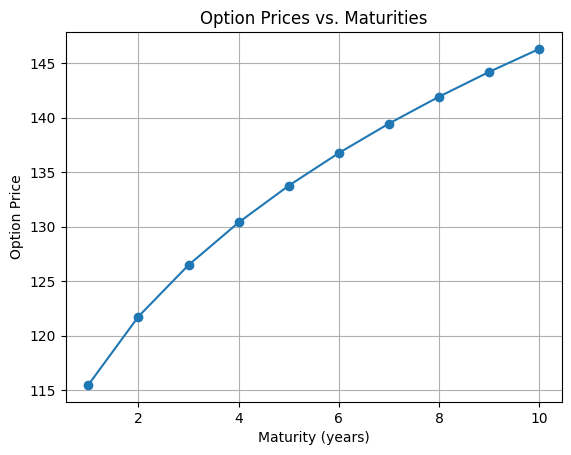

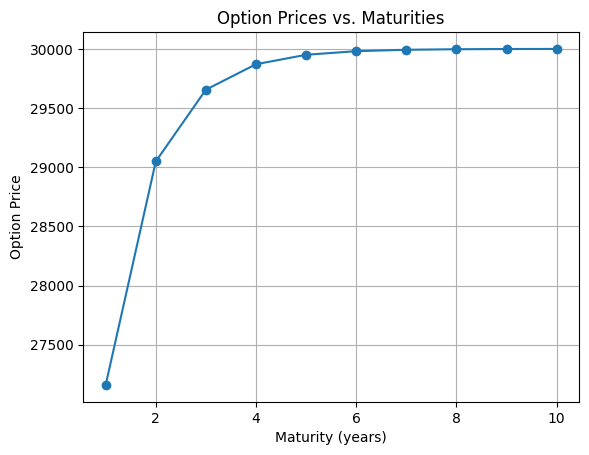

In [21]:
def embedded_options_max_return_closed_form_black_scholes(S1, S2, r, t, T, choleski):
    """
    Calculate the Black-Scholes option price with an embedded max return feature in a closed form.

    Parameters:
        S1 (float): Current price of the first underlying asset
        S2 (float): Current price of the second underlying asset
        T (float): Time to maturity (in years)
        choleski: The Cholesky decomposition of the covariance matrix 

    Returns:
        float: The Black-Scholes option price with an embedded max return feature
    """
  
    # Calculate the parameters for the option (slide 191)
    ut = -(choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T/2
    vt = np.sqrt((choleski[1,1]**2+(choleski[1,0]-choleski[0,0])**2)*T)
    
    # Black-Scholes parameters with max return feature
    d2 = (np.log(S1 / S2) - ut)/vt
    d1 = d2 - vt

    # Analytical formula for the option price 
    option_price = S2 * norm.cdf(-d1) - S1 * norm.cdf(-d2) + S1 * np.exp(-r * t)

    return option_price

Maturities = range(0,11) 

# Example slide 192
S1 = 100     # Current price of the first underlying asset
S2 = 100     # Current price of the second underlying asset
r = 0.04
t= 0
cho_1 =  np.array([[0.25, 0],
                   [0, 0.3]])

option_prices = []
for T in Maturities:
    option_price_t = embedded_options_max_return_closed_form_black_scholes(S1, S2, r, t, T, cho_1)
    option_prices.append(option_price_t)

# Plotting
plt.plot(Maturities, option_prices, marker='o')
plt.title('Option Prices vs. Maturities')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()


# Project
S1 = 15000   # Current price of the first underlying asset
S2 = 15000   # Current price of the second underlying asset
r = 0.0375
t= 0
cho_2 =  Cholesky

option_prices = []
for T in Maturities:
    option_price_t = embedded_options_max_return_closed_form_black_scholes(S1, S2, r, t, T, cho_2)
    option_prices.append(option_price_t)

# Plotting
plt.plot(Maturities, option_prices, marker='o')
plt.title('Option Prices vs. Maturities')
plt.xlabel('Maturity (years)')
plt.ylabel('Option Price')
plt.grid(True)
plt.show()




### Question 3
Price the contract by Monte-Carlo simulations for T = 1, 2, ...10 years. Compare your results with those obtained with the closed-form expression. Test different steps of time and check the convergence.

In [22]:
def simulate_paths(S0, r, sigma, T, m, p, choleski):
    """
    Simulate paths of S_t under the risk-neutral measure Q.

    Parameters:
        S0 (float): Initial price of the asset
        r (float): Risk-free interest rate
        sigma (float): Volatility of the asset
        T (float): Time to maturity (in years)
        m (int): Number of time steps
        p (int): Number of simulations
        choleski: The Cholesky decomposition of the covariance matrix 

    Returns:
        numpy.ndarray: Matrix of simulated paths with shape (m+1, p)
    """
    dt = T / m
    paths = np.zeros((m+1, p))
    paths[0, :] = S0

    for j in range(1, m+1):
        DeltaSJ = r * paths[j-1] * dt + sigma * paths[j-1] * np.sqrt(dt) * np.random.normal(size=p)
        paths[j, :] = paths[j-1] + DeltaSJ

    return paths, p.mean(paths[-1, :]) 

# Parameters
S0 = 1500      # Initial price of the asset
r = 0.0375      # Risk-free interest rate
sigma = 0.3   # Volatility of the asset
T = 1         # Time to maturity (in years)
m = 100       # Number of time steps
p = 1000      # Number of simulations

choleski = Cholesky

# Simulate paths
paths = simulate_paths(S0, r, sigma, T, m, p, choleski)

# Plotting
plt.figure(figsize=(10, 6))
for i in range(p):
    plt.plot(np.linspace(0, T, m+1), paths[:, i])
plt.title('Simulated Paths of S_t under Q')
plt.xlabel('Time')
plt.ylabel('Asset Price')
plt.grid(True)
plt.show()

AttributeError: 'int' object has no attribute 'mean'

In [11]:
print("Average Price:", np.mean(paths[-1, :]))

Average Price: 102.80568533055792


### Question 4
We assume that in case of death before expiry, the inheritor will receive the maximum between the initial premium (15 000€) and the funds
tracking the Eurostoxx 50 and the AMEX. Evaluate this death insurance for T = 1, 2, ...10 years, using Monte-Carlo simulations. Test different steps of time and check the convergence.

xmin = np.log(50/95)  # Lower bound of x
xmax = np.log(150/95)  # Upper bound of x
N = 300 # Number of time steps
M = 20  # Number of spatial steps

# Define the time and spatial step sizes
dt = T / N
h = (xmax - xmin) / M
print('The value of alpha is',dt/h**2) # making sure we have the stability condition

# Define the arrays for the stock price and time
x = np.linspace(xmin, xmax, M+1)
t = np.linspace(0, T, N+1)

# Define the initial and boundary conditions
V = np.zeros((N+1, M+1))
q=np.maximum(0,S0 * np.exp(x) - K)
V[N, :] = np.minimum(q, 10)
V[:, 0] = 0

for j in range(N+1):
    if S0*np.exp(xmax) >= K + 10:
        V[j,M] = 10* np.exp(-r*(T-j*dt))
    elif S0*np.exp(xmax) <= K:
        V[j,M] = 0
    else:
        V[j,M] = (S0*np.exp(xmax) - K)* np.exp(-r*(T-j*dt))
    # V[j,M] = 10

# Define the coefficients of the discretized equation

ce = ( 0.5 * r/h + (1/h - 1/2)* 0.5/h * sigma**2)*dt / (1+r*dt)
be = (1 -  dt * sigma**2/h**2) / (1+r*dt)
ae = (- 0.5 * r/h + (1/h + 1/2)* 0.5/h * sigma**2)*dt / (1+r*dt)

# Solve the equation using the explicit method
for i in range( N-1,-1,-1):

    for j in range(1, M):

        V[i, j] = ae*V[i+1, j-1] + be * (V[i+1, j]) + ce * (V[i+1, j+1] )

# for i in range(M+1):
#
#     plt.plot(t,V[:,i])
# plt.show()

step = 12
print(V[0,step])

# Plot the matrix
plt.imshow(V, origin='lower', extent=[50, 150, 0, 1], cmap='hot', aspect='auto')
plt.colorbar(label='Option Price')
plt.xlabel('Value of Stock Price')
plt.ylabel('Time')
plt.title(f'Option Price: {np.round(V[0,step],3)} (for M={M}, N={N} and Index={step})')
plt.show()